# DATA IMBALANCE

## DATA IMBALANCE 
is the occurance of dataset with unequal distribution in its classess where as there is no 50/50 or 60/40 balancing state

## why data do we balance data
we prefer balancing data in order to minimize the fractuation of informations simply the computer tends to look up the majority
data rather than minority data.

## what data do we balance
The data to be balanced is when the target data is unequal in the class.

## methods used to balance data
methods used to balance data includes the following

MORE DATA COLLECTION

CHANGING PERFORMANCE METRICS

RESAMPLING

OVERSAMPLING AND UNDERSAMPLING

PENALIZED MODELS




#IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("train_data_week_1_challenge.csv")
data.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,continue,s01746,M,BC,0.666,0.468,0.666,7,6,other,True,305,354,86.0,1986.0
1,continue,s16986,M,BC,0.172,0.420,0.172,8,10,mother,False,331,516,15.0,1996.0
2,continue,s00147,F,BC,0.212,0.601,0.212,1,4,mother,False,311,209,14.0,1976.0
3,continue,s08104,F,ST,0.434,0.611,0.434,2,5,father,True,364,147,28.0,1911.0
4,continue,s11132,F,SC,0.283,0.478,0.283,1,10,mother,True,394,122,15.0,1889.0


In [3]:
data.continue_drop.value_counts()

continue    16384
drop          806
Name: continue_drop, dtype: int64

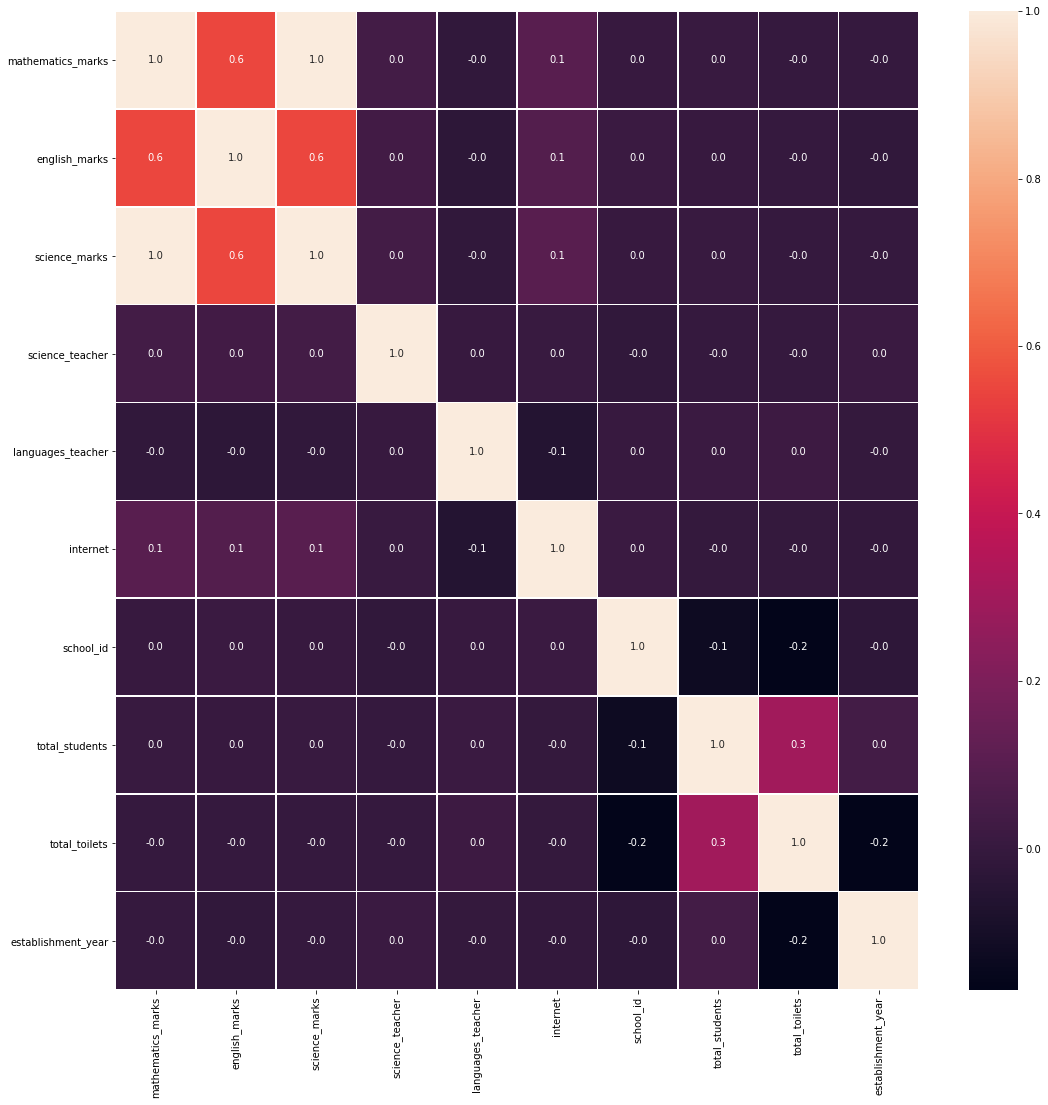

In [4]:
#visualization
# correlation matrix
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [5]:
columns_to_transform = [ 'gender','caste','guardian','internet' ]
data = pd.get_dummies( data,columns = columns_to_transform )
data.head()


,continue_drop,student_id,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,school_id,total_students,total_toilets,...,caste_BC,caste_OC,caste_SC,caste_ST,guardian_father,guardian_mixed,guardian_mother,guardian_other,internet_False,internet_True
0,continue,s01746,0.666,0.468,0.666,7,6,305,354,86.0,...,1,0,0,0,0,0,0,1,0,1
1,continue,s16986,0.172,0.420,0.172,8,10,331,516,15.0,...,1,0,0,0,0,0,1,0,1,0
2,continue,s00147,0.212,0.601,0.212,1,4,311,209,14.0,...,1,0,0,0,0,0,1,0,1,0
3,continue,s08104,0.434,0.611,0.434,2,5,364,147,28.0,...,0,0,0,1,1,0,0,0,0,1
4,continue,s11132,0.283,0.478,0.283,1,10,394,122,15.0,...,0,0,1,0,0,0,1,0,0,1


In [6]:
mapping_dict={"continue_drop":{"drop":0,"continue":1}}

In [7]:
data.replace(mapping_dict,inplace=True)

In [8]:
data= data.drop('student_id', 1)

In [9]:
#BALANCING DATA USING UNDER SAMPLING
from sklearn.utils import resample

In [10]:
data_maj = data[data.continue_drop==1]
data_min = data[data.continue_drop==0]

In [11]:
data_minority_upsampled = resample(data_min, 
                                 replace=True,     # sample with replacement
                                 n_samples=16384,    # to match majority class
                                 random_state=123) # reproducible results
 

In [12]:
data_upsampled = pd.concat([data_maj, data_minority_upsampled])

In [13]:
data_upsampled.continue_drop.value_counts()

1    16384
0    16384
Name: continue_drop, dtype: int64

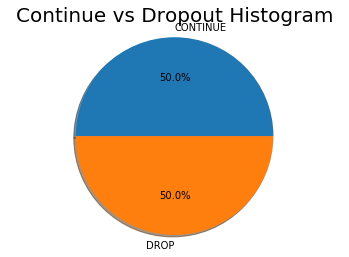

In [14]:
labels = ['CONTINUE', 'DROP']
sizes = [data_upsampled['continue_drop'].value_counts()[0],
         data_upsampled['continue_drop'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Continue vs Dropout Histogram', fontsize=20)
plt.show()